<a href="https://colab.research.google.com/github/Shezan57/Machine-learning/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn

importing libraries

In [45]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

In [6]:
mnist = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

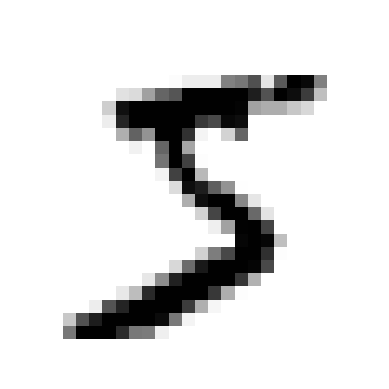

In [17]:
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [18]:
y[0]

'5'

train test split

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training a Binary  Classifier

In [20]:
y_train_5 = (y_train =='5')
y_test_5 = (y_test == '5')

In [22]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
sgd_clf.predict([some_digit])

array([ True])

performance measures

using cross-validation

In [25]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [27]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [28]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [30]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [32]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [33]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [35]:
precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [36]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [38]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [39]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [41]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [42]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3,method="decision_function")

In [51]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

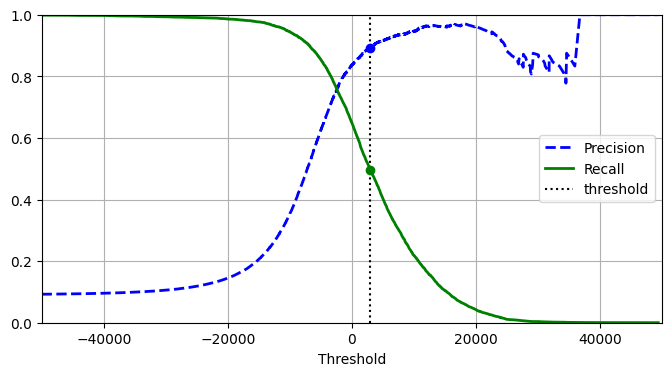

In [53]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()